# Lecture 2_3: The Wright-Fisher Model

## Example 2.11
**1. Find the stationary distribution of the WF model with mutation given $u=v=0.05$ & $N=6$.**

From last lecture we have

In [4]:
import numpy as np

def wright_fisher_mu_transition_matrix(N,u,v):
    """
    Generate the transition probability matrix for the Wright-Fisher model.

    Parameters:
    - N: Population size
    - u: mutation rate from 'A'->'a'
    - v: mutation rate from 'a'->'A'

    Returns:
    - P: Transition probability matrix
    """

    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            x=i/N*(1-u)+(1 - i/N)*v
            y=i/N*(u)+(1 - i/N)*(1-v)
            P[i, j] = (np.math.comb(N, j) * (x ** j) * (y ** (N - j)))

    return P

In [32]:
t_matrix=wright_fisher_mu_transition_matrix(6,0.05,0.05)

/tmp/ipykernel_150/3045385930.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  P[i, j] = (np.math.comb(N, j) * (x ** j) * (y ** (N - j)))


We have to obtain the eigensystem:

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(t_matrix)
print(eigenvalues)

[1.         0.9        0.675      0.405      0.18225    0.054675
 0.00820125]


Note taht eigevectors here is a matrix where each column is an eigenvector. I.e. it is the matrix $A$ in $A.D.A^{-1}$

In [34]:
eigenvectors[:,0]

array([0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447,
       0.37796447, 0.37796447])

In [35]:
t_matrix@eigenvectors[:,0]

array([0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447,
       0.37796447, 0.37796447])

The eigenvectors above are the right eigenvectors, we want the left eigenvectors (i.e., the rows of $A^{-1}$):

In [36]:
leftEVs=np.linalg.inv(eigenvectors);

In [37]:
leftEVs[0]@t_matrix

array([0.47820931, 0.37065865, 0.31906156, 0.30989228, 0.31906156,
       0.37065865, 0.47820931])

The probabilities have to sum to $1$ so we normalize the length of the eigevector in this fashion.

In [38]:
statDist=leftEVs[0]/np.sum(leftEVs[0])
print(statDist)

[0.18074613 0.1400958  0.12059393 0.11712827 0.12059393 0.1400958
 0.18074613]


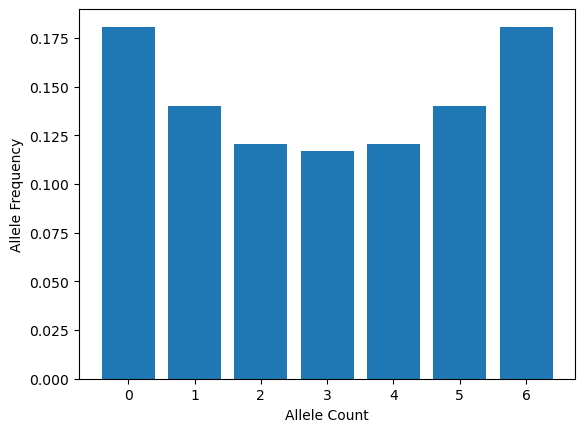

In [39]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.bar(range(len(statDist)), statDist)

# Adding labels and title
plt.xlabel('Allele Count')
plt.ylabel('Allele Frequency')

# Display the plot
plt.show()

This says that the probability that the allele is in $0,1,2,\dots N$ copies after a loooong time is approximately equal.

**2. Repeat this for  $u=v=0.005$.**

In [40]:
t_matrix2=wright_fisher_mu_transition_matrix(6,0.005,0.005)
eigenvalues, eigenvectors = np.linalg.eig(t_matrix2)
leftEVs=np.linalg.inv(eigenvectors);
statDist2=leftEVs[0]/np.sum(leftEVs[0])
print(statDist2)

[0.43767708 0.03348106 0.01975149 0.01818075 0.01975149 0.03348106
 0.43767708]


/tmp/ipykernel_150/3045385930.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  P[i, j] = (np.math.comb(N, j) * (x ** j) * (y ** (N - j)))


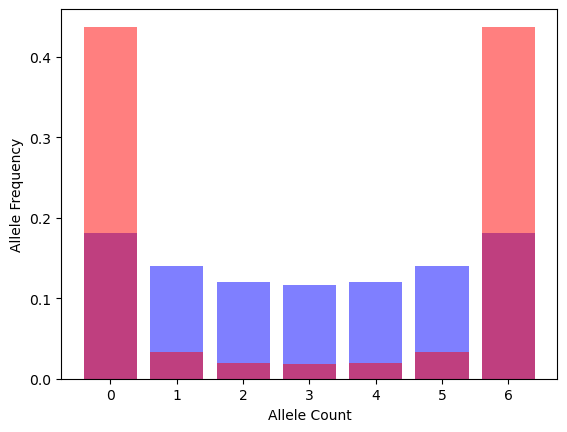

In [41]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.bar(range(len(statDist)), statDist,color='blue',alpha=0.5)
plt.bar(range(len(statDist2)), statDist2,color='red',alpha=0.5)

# Adding labels and title
plt.xlabel('Allele Count')
plt.ylabel('Allele Frequency')

# Display the plot
plt.show()